In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# we read the attribute names and store them in the columns var
with open("data/communities.names") as f: 
    columns = [l.split(" ")[1] for l in f.readlines() if l.startswith("@attribute")]
# we read the data file and store it in the dataframe
df = pd.read_csv('data/communities.data', header=None, names=columns, na_values='?')
# dropping first 5 columns
df = df.drop(columns=["state", "county", "community", "communityname", "fold"]) 

# Dropping columns with NaN values
df.dropna(axis=1, inplace=True)

df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [128]:
# Splitting the df to train and test df
from sklearn.model_selection import train_test_split
X = df.drop('ViolentCrimesPerPop', axis=1)
y = df['ViolentCrimesPerPop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
# Ridge regression
from sklearn.linear_model import Ridge
import sys
from sklearn.model_selection import cross_val_score

# getting the best regularization parameter from a list (based on mse score)
def ridge_best_regularization_param(regularization_parameters): # we pass a list of regularization paramters
    score_list = []
    best_score = sys.float_info.min
    best_index =  -1
    for index, alpha in enumerate(regularization_parameters):
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train, y_train)
        score = np.mean(cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')) # getting the r2 score via cross validation
        score_list.append(score)
        if score > best_score:
            best_score = score
            best_index = index
    return score_list, best_index

regularization_paramters = 0.001 * 1.5 ** np.arange(27)
np.set_printoptions(precision=6, suppress=True) # ignore this, just setting print options for numpy
print(regularization_paramters)
score_list, best_rp_index = ridge_best_regularization_param(regularization_paramters)

[ 0.001     0.0015    0.00225   0.003375  0.005063  0.007594  0.011391
  0.017086  0.025629  0.038443  0.057665  0.086498  0.129746  0.19462
  0.291929  0.437894  0.656841  0.985261  1.477892  2.216838  3.325257
  4.987885  7.481828 11.222741 16.834112 25.251168 37.876752]


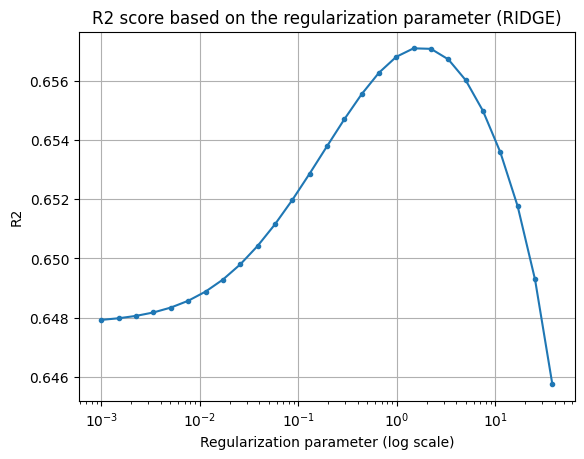

Best regularization parameter: 1.4778918800354004
Best R2 score: 0.6570860894971637


In [130]:
plt.plot(regularization_paramters, score_list, marker='.', linestyle='-')
plt.title('R2 score based on the regularization parameter (RIDGE)')
plt.xlabel('Regularization parameter (log scale)')
plt.ylabel('R2')
plt.xscale('log')
plt.grid(True)

# Show the plot
plt.show()

print(f"Best regularization parameter: {regularization_paramters[best_rp_index]}")
print(f"Best R2 score: {score_list[best_rp_index]}")

In [131]:
# Lasso regression
from sklearn.linear_model import Lasso

# getting the best regularization parameter from a list (based on mse score)
def lasso_best_regularization_param(regularization_parameters): # we pass a list of regularization paramters
    score_list = []
    best_score = sys.float_info.min
    best_index =  -1
    for index, alpha in enumerate(regularization_parameters):
        lasso_model = Lasso(alpha=alpha, max_iter=10000) # max iter to prevent ConvergenceWarning
        lasso_model.fit(X_train, y_train)
        score = np.mean(cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')) # getting the r2 score via cross validation
        score_list.append(score)
        if score > best_score:
            best_score = score
            best_index = index
    return score_list, best_index

regularization_paramters = 0.00001 * 1.5 ** np.arange(12)
np.set_printoptions(precision=7, suppress=True) # ignore this, just setting print options for numpy
print(regularization_paramters)
score_list, best_rp_index = lasso_best_regularization_param(regularization_paramters)
# print(regularization_paramters[best_rp_index])

[0.00001   0.000015  0.0000225 0.0000338 0.0000506 0.0000759 0.0001139
 0.0001709 0.0002563 0.0003844 0.0005767 0.000865 ]


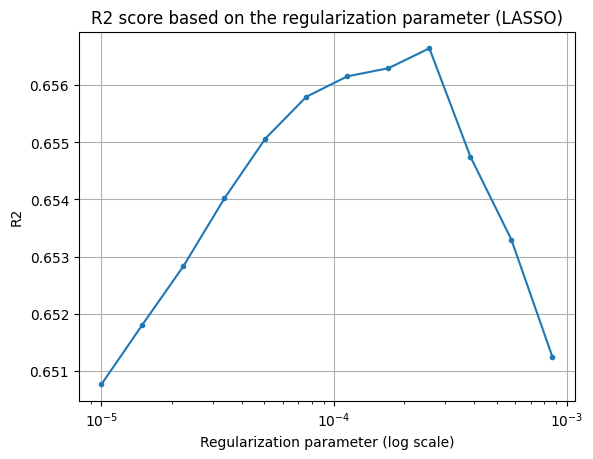

Best regularization parameter: 0.0002562890625
Best MSE score: 0.6566426806719601


In [132]:
plt.plot(regularization_paramters, score_list, marker='.', linestyle='-')
plt.title('R2 score based on the regularization parameter (LASSO)')
plt.xlabel('Regularization parameter (log scale)')
plt.ylabel('R2')
plt.xscale('log')
plt.grid(True)

# Show the plot
plt.show()

print(f"Best regularization parameter: {regularization_paramters[best_rp_index]}")
print(f"Best MSE score: {score_list[best_rp_index]}")

In [133]:
# Comparing my ffs and lasso ffs

best_rp_lasso = regularization_paramters[best_rp_index]
lasso_model = Lasso(alpha=best_rp_lasso)
lasso_model.fit(X_train, y_train)
my_ffs_features = ['PctKids2Par',
 'racePctWhite',
 'HousVacant',
 'pctUrban',
 'PctWorkMom',
 'PctPopUnderPov',
 'NumStreet',
 'pctWInvInc',
 'numbUrban',
 'MedOwnCostPctIncNoMtg',
 'PctIlleg',
 'PctVacantBoarded',
 'MedRentPctHousInc',
 'agePct12t29',
 'pctWRetire',
 'pctWSocSec',
 'LemasPctOfficDrugUn',
 'PctEmplManu',
 'RentLowQ',
 'MedRent',
 'MalePctDivorce',
 'PctVacMore6Mos',
 'AsianPerCap',
 'whitePerCap',
 'MalePctNevMarr',
 'PctUnemployed',
 'PctWorkMomYoungKids'] # copy pasted from v2

lasso_features_set = set(lasso_model.feature_names_in_)
my_ffs_features_set = set(my_ffs_features)

print(f"Same features: {lasso_features_set.intersection(my_ffs_features_set)}")
print(f"In lasso features only: {lasso_features_set.difference(my_ffs_features_set)}")
print(f"In my ffs only: {my_ffs_features_set.difference(lasso_features_set)}")


Same features: {'MalePctNevMarr', 'MedRent', 'pctWRetire', 'racePctWhite', 'pctUrban', 'numbUrban', 'PctEmplManu', 'PctWorkMom', 'MedOwnCostPctIncNoMtg', 'PctPopUnderPov', 'LemasPctOfficDrugUn', 'MalePctDivorce', 'agePct12t29', 'PctVacantBoarded', 'PctIlleg', 'RentLowQ', 'PctWorkMomYoungKids', 'PctKids2Par', 'PctVacMore6Mos', 'whitePerCap', 'PctUnemployed', 'HousVacant', 'pctWSocSec', 'pctWInvInc', 'MedRentPctHousInc', 'AsianPerCap', 'NumStreet'}
In lasso features only: {'PctHousLess3BR', 'medIncome', 'RentHighQ', 'medFamInc', 'PctPersDenseHous', 'racePctAsian', 'PersPerFam', 'agePct65up', 'householdsize', 'NumIlleg', 'RentMedian', 'PctLess9thGrade', 'PctBSorMore', 'PopDens', 'PctImmigRec10', 'OwnOccLowQuart', 'PctLargHouseFam', 'PctUsePubTrans', 'LandArea', 'PctImmigRecent', 'PctFam2Par', 'agePct12t21', 'PctHousNoPhone', 'PctRecImmig10', 'pctWFarmSelf', 'population', 'HispPerCap', 'PctTeen2Par', 'PctImmigRec8', 'PctHousOwnOcc', 'PctSameState85', 'PctBornSameState', 'MedYrHousBuilt', '

In [134]:
# Wine dataset
wine_df = pd.read_csv("./data/winequality-white.csv", delimiter=';')
wine_df.head()

# splitting the df to train and test df
wine_X = wine_df.drop('quality', axis=1)
wine_y = wine_df['quality']
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, test_size=0.2, random_state=0)

In [135]:
# Ridge regression via gradient descent - MY TRY

def ridge_regression_my_GD(X,y, lambda_param, max_iter=1000, alpha=0.001):
    # X - features
    # y - target variable
    # lambda_param - regression parameter
    # alpha - learning rate

    # adding a column of ones to X
    X = np.column_stack((np.ones(X.shape[0]), X))
    # init the betas (as a vector of 0s)
    w = np.zeros(X.shape[1])
    # changing y to numpy array
    y = np.array(y)

    for iteration in range(max_iter):
        summ = np.zeros(len(X[0,:]))
        for i in range(len(X)): # going through all the X rows
            summ = summ +  (y[i] - np.dot(w, X[i,])) * X[i,]
        grad = -2 * summ + np.dot(2 * lambda_param, w) # calculating the gradient
        
        
        # grad = grad / np.linalg.norm(grad) # TODO COMMENT

        # w_prev = w # TODO COMMENT

        w = w + alpha * grad
        print(f"Iteration: {iteration}\n{w}") # TODO Betas go through the roof, idk why, wtf do i do  

        # break # TODO if idk what is smaller than tolerance then we quit
    return w


w = ridge_regression_my_GD(X=wine_X_train, y=wine_y_train, lambda_param=1, max_iter=100)




Iteration: 0
[  -46.17       -315.8379      -12.71696     -15.35276    -290.492
    -2.08376   -1634.144     -6340.822       -45.8869407  -147.29206
   -22.68434    -489.3485867]
Iteration: 1
[-7.4081843e+06 -5.0942755e+07 -2.0786304e+06 -2.4991397e+06
 -5.1827614e+07 -3.4955132e+05 -2.8736133e+08 -1.1199606e+09
 -7.3673394e+06 -2.3615338e+07 -3.6684170e+06 -7.6684815e+07]
Iteration: 2
[-1.3070128e+12 -8.9877657e+12 -3.6673383e+11 -4.4092371e+11
 -9.1448334e+12 -6.1673103e+10 -5.0701429e+13 -1.9760915e+14
 -1.2998074e+12 -4.1664110e+12 -6.4721801e+11 -1.3529046e+13]
Iteration: 3
[-2.3061263e+17 -1.5858241e+18 -6.4707446e+16 -7.7797694e+16
 -1.6135376e+18 -1.0881759e+16 -8.9458870e+18 -3.4866661e+19
 -2.2934129e+17 -7.3513207e+17 -1.1419678e+17 -2.3870990e+18]
Iteration: 4
[-4.0689877e+22 -2.7980682e+23 -1.1417146e+22 -1.3726822e+22
 -2.8469667e+23 -1.9200051e+21 -1.5784350e+24 -6.1519620e+24
 -4.0465559e+22 -1.2970857e+23 -2.0149169e+22 -4.2118579e+23]
Iteration: 5
[-7.1794251e+27 -4.9

C:\Users\krist\AppData\Local\Temp\ipykernel_11032\3085369045.py:19: RuntimeWarning: overflow encountered in add
  summ = summ +  (y[i] - np.dot(w, X[i,])) * X[i,]
C:\Users\krist\AppData\Local\Temp\ipykernel_11032\3085369045.py:20: RuntimeWarning: overflow encountered in multiply
  grad = -2 * summ + np.dot(2 * lambda_param, w) # calculating the gradient


Iteration: 64
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 65
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 66
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 67
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 68
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 69
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 70
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 71
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 72
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 73
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 74
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 75
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 76
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 77
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 78
[nan nan nan nan nan nan nan nan nan nan nan nan]
Iteration: 79
[nan nan nan nan nan nan n